# Data Examples

## Example 1: Analysis of `Boston Housing Data`

Description of variables in Boston Housing dataset:

    CRIM: Crime rate
    ZN: Percentage of residential land zoned for lots over 25,000 ft 2
    INDUS: Percentage of land occupied by nonretail business
    CHAS: Does tract bound Charles River (= 1 if tract bounds river, = 0 otherwise)
    NOX: Nitric oxide concentration (parts per 10 million)
    RM: Average number of rooms per dwelling
    AGE: Percentage of owner-occupied units built prior to 1940
    DIS: Weighted distances to five Boston employment centers
    RAD: Index of accessibility to radial highways
    TAX: Full-value property tax rate per `$10,000`
    PTRATIO: Pupil-to-teacher ratio by town
    LSTAT: Percentage of lower status of the population
    MEDV: Median value of owner-occupied homes in `$1000s`    
    CAT.MEDV Is median value of owner-occupied homes in tract above $30,000 (CAT.MEDV = 1) or not (CAT.MEDV = 0)
    
Importing the libraries

In [1]:
import os
import matplotlib
import calendar
import squarify
import gmaps
import cartopy

from sklearn import preprocessing
from pandas.plotting import scatter_matrix, parallel_coordinates

import seaborn as sns
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs

In [2]:
# Load dataset
housing_df = pd.read_csv("../datasets/BostonHousing.csv")

# Rename CAT.MEDV column for easier data handling
housing_df = housing_df.rename(columns={"CAT. MEDV": "CAT_MEDV"})
housing_df.head(9)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7,0
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9,0
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,19.15,27.1,0
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,29.93,16.5,0


We consider three possible tasks:

1. A supervised predictive task, where the outcome variable of interest is the median value of a home in the tract (MEDV).
2. A supervised classification task, where the outcome variable of interest is the binary variable CAT.MEDV that indicates whetherthe home value is above or below \\$30,000.
3. An unsupervised task, where the goal is to cluster census tracts.

## Example 2: `Ridership on Amtrak Trains`

Amtrak, a US railway company, routinely collects data on ridership. Here, we focus on forecasting future ridership using the series of monthly ridership between January 1991 and March 2004.

In [3]:
## Load the Amtrack data and convert them to be suitable for time series analysis
amtrack_df = pd.read_csv("../datasets/Amtrak.csv", squeeze=True)
amtrack_df["Date"] = pd.to_datetime(amtrack_df.Month, format="%d/%m/%Y")
ridership_ts = pd.Series(amtrack_df.Ridership.values, index=amtrack_df.Date)
ridership_ts

Date
1991-01-01    1708.917
1991-02-01    1620.586
1991-03-01    1972.715
1991-04-01    1811.665
1991-05-01    1974.964
                ...   
2003-11-01    2076.054
2003-12-01    2140.677
2004-01-01    1831.508
2004-02-01    1838.006
2004-03-01    2132.446
Length: 159, dtype: float64

# Basic Charts: Bar Charts, Line Charts and Scatter Plots

Pandas version:

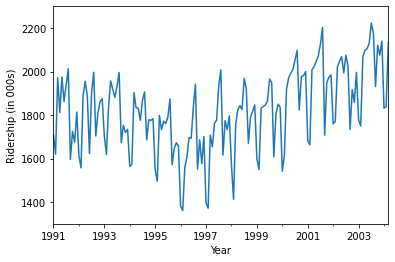

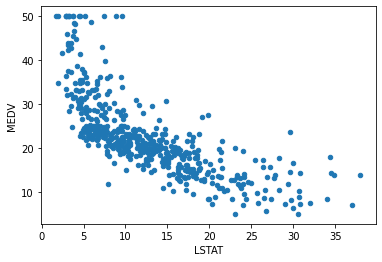

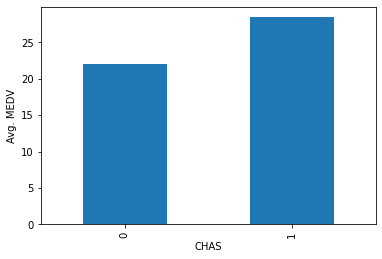

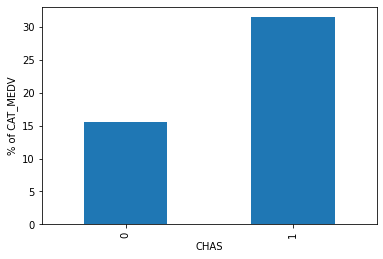

In [4]:
# line graph
ridership_ts.plot(ylim=[1300,  2300], legend=False)
# set x-axis and y-axis labels
plt.xlabel("Year")
plt.ylabel("Ridership (in 000s)")
plt.show()

# scatter plot with axes names
housing_df.plot.scatter(x="LSTAT", y="MEDV", legend=False)
plt.show()

# barchart of CHAS vs. MEDV
# by the mean MEDV per CHAS = (0, 1)
housing_df.groupby("CHAS").mean().MEDV.plot(kind="bar")
plt.ylabel("Avg. MEDV")
plt.show()

# barchart of CHAS vs. CAT_MEDV
data_for_plot = housing_df.groupby("CHAS").mean()["CAT_MEDV"] * 100
data_for_plot.plot(kind="bar")
plt.ylabel("% of CAT_MEDV")
plt.show()

matplolib version

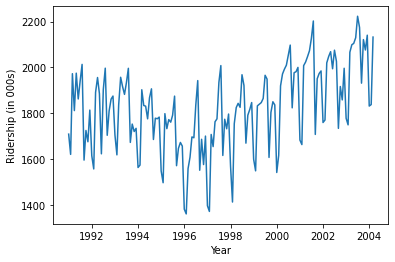

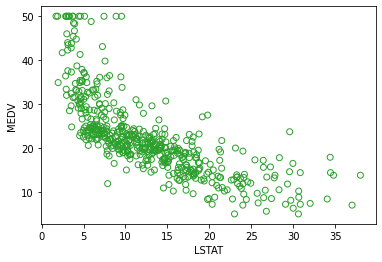

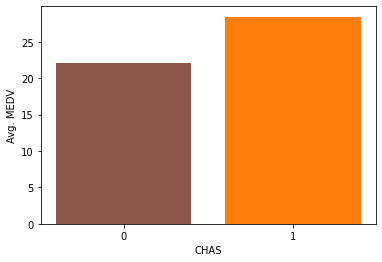

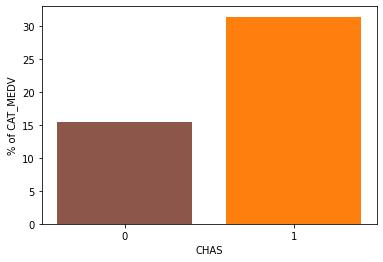

In [5]:
# line graph
plt.plot(ridership_ts.index, ridership_ts)
plt.xlabel("Year")
plt.ylabel("Ridership (in 000s)")
plt.show()

# Set the color of the points in the scatterplot and draw as open circles
plt.scatter(housing_df.LSTAT, housing_df.MEDV, color="C2", facecolor="None")
plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.show()

# barchart of CHAS vs. mean MEDV
# compute mean MEDV per CHAS = (0, 1)
data_for_plot = housing_df.groupby("CHAS").mean().MEDV
fig, ax = plt.subplots()
ax.bar(data_for_plot.index, data_for_plot, color=["C5", "C1"])
ax.set_xticks([0, 1])
ax.set_xlabel("CHAS")
ax.set_ylabel("Avg. MEDV")
plt.show()

# barchart of CHAS vs. CAT.MEDV
data_for_plot = housing_df.groupby("CHAS").mean()["CAT_MEDV"] * 100
fig, ax = plt.subplots()
ax.bar(data_for_plot.index, data_for_plot, color=["C5", "C1"])
ax.set_xticks([0, 1])
ax.set_xlabel("CHAS")
ax.set_ylabel("% of CAT_MEDV")
plt.show()

## Distribution Plots: Boxplots and Histograms

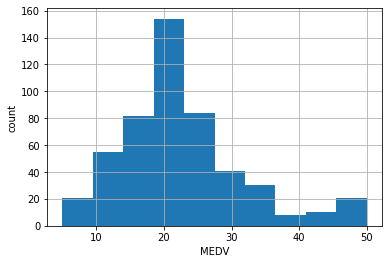

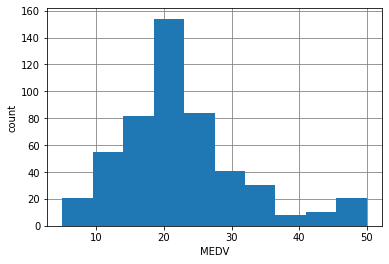

In [6]:
# histogram of MEDV
ax = housing_df.MEDV.hist()
ax.set_xlabel("MEDV")
ax.set_ylabel("count")
plt.show()

# alternative plot with maplotlib
fig, ax = plt.subplots()
ax.hist(housing_df.MEDV)
# show the grid lines behing the histogram
ax.set_axisbelow(True)
ax.grid(which="major", color="grey", linestyle="-")
ax.set_xlabel("MEDV")
ax.set_ylabel("count")
plt.show()

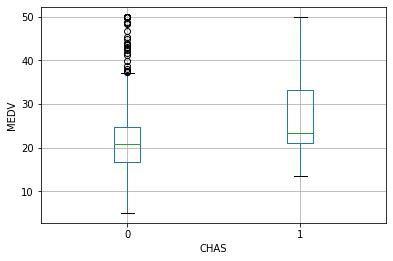

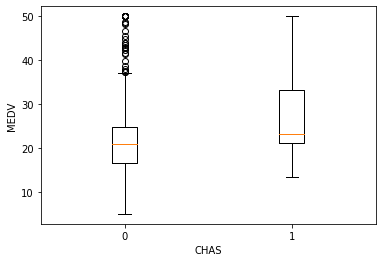

In [7]:
# boxplot of MEDV for different values of CHAS (0, 1)
ax = housing_df.boxplot(column="MEDV", by="CHAS")
ax.set_ylabel("MEDV")
# suppress the titles
plt.suptitle("")
plt.title("")
plt.show()

# alternative plot with matplotlib
data_for_plot = [list(housing_df[housing_df.CHAS == 0].MEDV),
                 list(housing_df[housing_df.CHAS == 1].MEDV)]
fig, ax = plt.subplots()
ax.boxplot(data_for_plot)
ax.set_xticks([1, 2])
ax.set_xticklabels([0, 1])
ax.set_xlabel("CHAS")
ax.set_ylabel("MEDV")
plt.show()

Using boxplots to evaluate the potential of numerical predictors (these are the ones that discriminate more the categorical value - e.g. PTRATIO and INDUS)

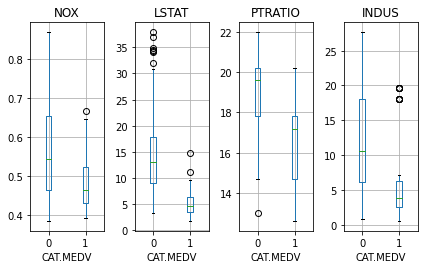

In [8]:
# side-by-side boxplots
fig, axes = plt.subplots(nrows=1, ncols=4)
housing_df.boxplot(column="NOX", by="CAT_MEDV", ax=axes[0])
housing_df.boxplot(column="LSTAT", by="CAT_MEDV", ax=axes[1])
housing_df.boxplot(column="PTRATIO", by="CAT_MEDV", ax=axes[2])
housing_df.boxplot(column="INDUS", by="CAT_MEDV", ax=axes[3])

for ax in axes:
    ax.set_xlabel("CAT.MEDV")

# suppress the overall title
plt.suptitle("")
# increase the separation between the plots
plt.tight_layout()

# Heatmaps: visualizing correlations and missing values

A heatmap is a graphical display of numerical data where color is used to denote values.

- Heatmap of correlation:

<AxesSubplot:>

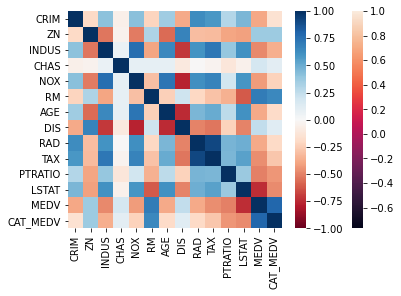

In [9]:
# simple heatmap of correlations (without values)
corr = housing_df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

# change the colormap to a divergent scale and fix the range of the colormap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            vmin=-1, vmax=1, cmap="RdBu")

<AxesSubplot:>

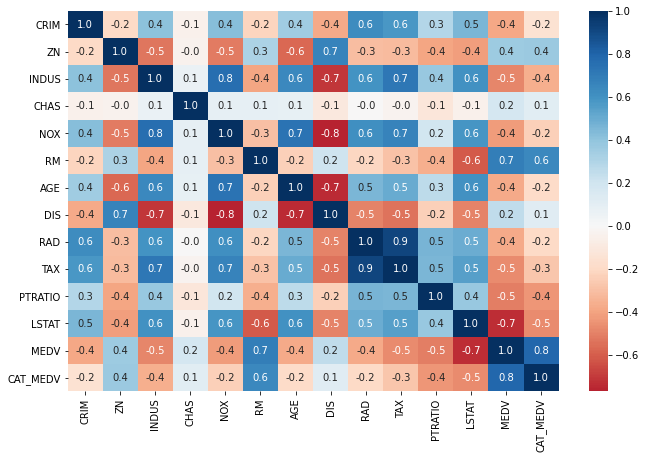

In [10]:
# include information about values
# (example demonstrate how to control the size of the plot)
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

- Heatmap of missing values:

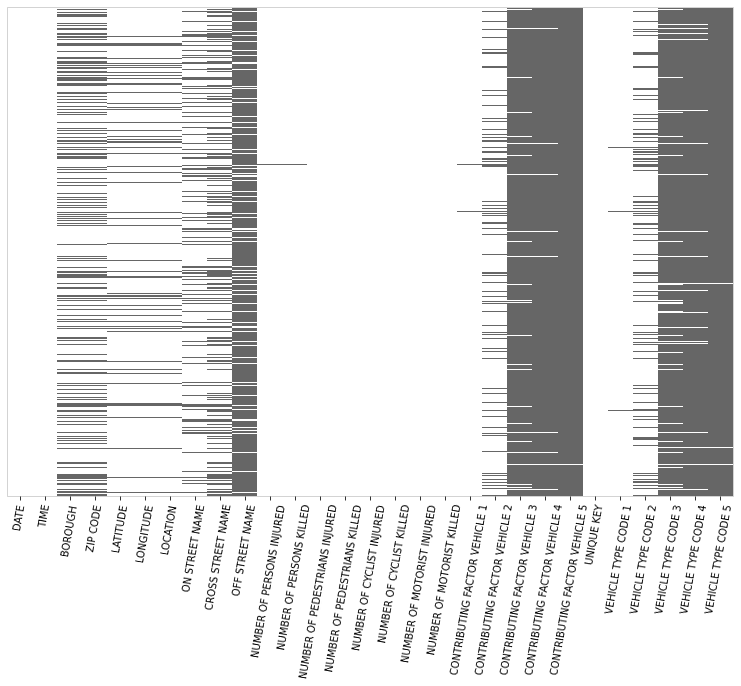

In [11]:
df = pd.read_csv("../datasets/NYPD_Motor_Vehicle_Collisions_1000.csv").sort_values(["DATE"])

# given a dataframe df create a copy of the array that is 0 if a field contains a value and 1 for NAN
na_info = np.zeros(df.shape)
na_info[df.isna().values] = 1
na_info = pd.DataFrame(na_info, columns=df.columns)

fig, ax = plt.subplots()
fig.set_size_inches(13, 9)
ax = sns.heatmap(na_info, vmin=0, vmax=1, cmap=["white", "#666666"],
                 cbar=False, ax=ax)
ax.set_yticks([])

# draw frame around figure
rect = plt.Rectangle((0, 0), na_info.shape[1], na_info.shape[0],
                     linewidth=1, edgecolor="lightgrey", facecolor="none")
rect = ax.add_patch(rect)
rect.set_clip_on(False)
plt.xticks(rotation=80)
plt.show()

# Multidimensional visualization

Basic plots can convey richer information with features such as color, size, and multiple panels, and by enabling operations such as rescaling, aggregation, and interactivity. These additions allow looking at more than one or two variables at a time. The beauty of these additions is their effectiveness in displaying complex information in an easily understandable way.

## Adding Variables: Color, Size, Shape, Multiple Panels, and Animation

In order to include more variables in a plot, we must consider the type of variable to include. To represent additional categorical information, the best way is to use hue, shape, or multiple panels. For additional numerical information, we can use color intensity or size. Temporal information can be added via animation.

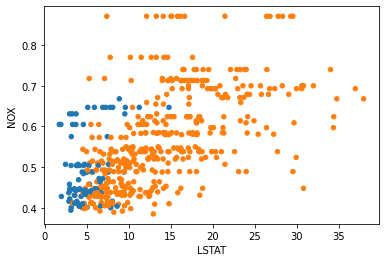

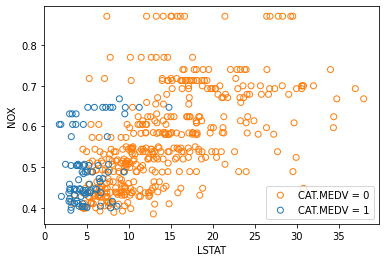

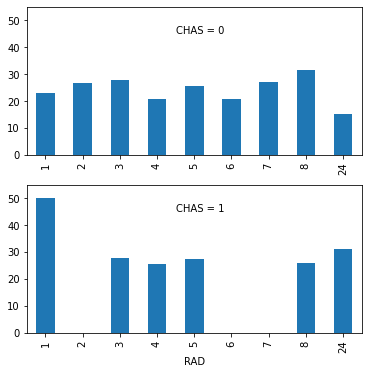

In [12]:
# color the points by the value of CAT.MEDV
housing_df.plot.scatter(x="LSTAT", y="NOX",
                        c=["C0" if c == 1 else "C1" for c in housing_df.CAT_MEDV])
plt.show()

# plot first the data points for CAT.MEDV of 0 and then of 1
# setting color to "none" gives open circles

_, ax = plt.subplots()
for cat_value, color in [(0, "C1"), (1, "C0")]:
    subset_df = housing_df[housing_df.CAT_MEDV == cat_value]
    ax.scatter(subset_df.LSTAT, subset_df.NOX, color="none",
               edgecolor=color)
ax.set_xlabel("LSTAT")
ax.set_ylabel("NOX")
ax.legend(["CAT.MEDV = 0", "CAT.MEDV = 1"])
plt.show()

# panel plots
# compute mean MEDV per RAD and CHAS
data_for_plot = housing_df.groupby(["CHAS", "RAD"]).mean()["MEDV"]

# we determine all possible RAD values to use as ticks
ticks = set(housing_df.RAD)
for i in range(2):
    for t in ticks.difference(data_for_plot[i].index):
        data_for_plot.loc[(i, t)] = 0

# reorder to rows, so that the index is sorted
data_for_plot = data_for_plot[sorted(data_for_plot.index)]

# determine a common range for the y axis
y_range = [0, max(data_for_plot) * 1.1]
fig, axes = plt.subplots(nrows=2, ncols=1)
fig.set_size_inches(6, 6)

data_for_plot[0].plot.bar(x="RAD", ax=axes[0], ylim=y_range)
data_for_plot[1].plot.bar(x="RAD", ax=axes[1], ylim=y_range)
axes[0].annotate('CHAS = 0', xy=(3.5, 45))
axes[1].annotate('CHAS = 1', xy=(3.5, 45))
axes[0].set_xlabel("")
plt.show()

In the context of prediction, color-coding supports the exploration of the conditional relationship between the numerical outcome (on the y-axis) and a numerical predictor. Color-coded scatter plots then help assess the need for creating interaction terms (e.g., is the relationship between MEDV and LSTAT different for homes near vs.
away from the river?).

Creating multiple panels (also called “trellising”) is done by splitting the observations according to a categorical variable, and creating a separate plot (of the same type) for each category.

An example is shown above, where a bar chart of average MEDV by RAD is broken down into two panels by CHAS. We see that the average MEDV for different highway accessibility levels (RAD) behaves differently for homes near the river (lower panel) compared to homes away from the river (upper panel). This is especially salient for RAD = 1. We also see that there are no near-river homes in RAD levels 2, 6, and 7. Such information might lead us to create an interaction term between RAD and CHAS, and to consider condensing some of the bins in RAD. All these explorations are useful for prediction and classification.

- Scatter plot matrix

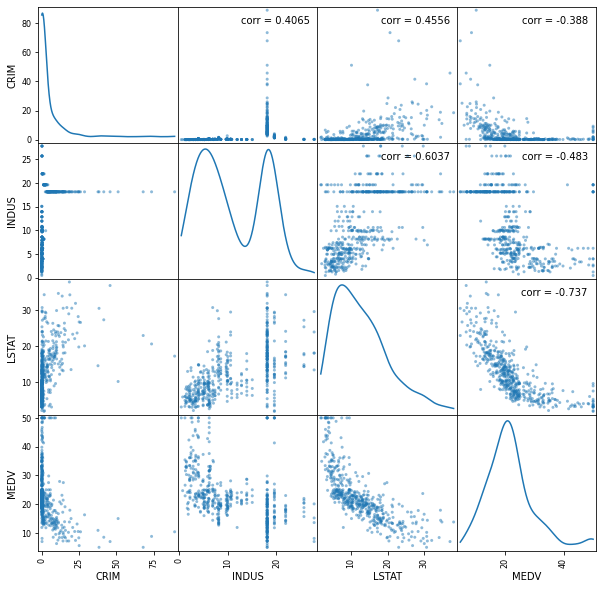

In [13]:
# display scatterplots between the different variables
# the diagonal shows the distribution for each variable

df = housing_df[["CRIM", "INDUS", "LSTAT", "MEDV"]]
axes = scatter_matrix(df, alpha=0.5, figsize=(10, 10),
                      diagonal="kde")

corr = df.corr().values
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("corr = {:.6}".format(str(corr[i,j])), xy=(0.7, 0.9),
                        xycoords="axes fraction", ha="center", va="center")
plt.show()

## Manipulations: Rescaling, Aggregation and Hierarchies, Zooming, Filtering

Most of the time spent in data mining projects is spent in preprocessing. Typically, considerable effort is expended getting all the data in a format that can actually be used in the data mining software. Additional time is spent processing the data in ways that improve the performance of the data mining procedures.

Transformations include changing the numeric scale of a variable, binning numerical variables, and condensing categories in categorical variables.

- Rescaling

Changing the scale in a display can enhance the plot and illuminate relationships.

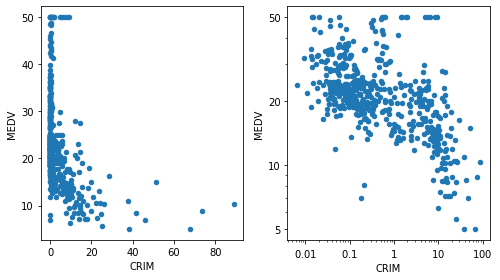

In [14]:
# avoid the use of scientific notation for the log axis
plt.rcParams["axes.formatter.min_exponent"] = 4

# scatter plot: regular and log scale
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 4))

# regular scale
housing_df.plot.scatter(x="CRIM", y="MEDV", ax=axes[0])

# log scale
ax = housing_df.plot.scatter(x="CRIM", y="MEDV", logx=True, logy=True, ax=axes[1])
ax.set_yticks([5, 10, 20, 50])
ax.set_yticklabels([5, 10, 20, 50])
plt.tight_layout()
plt.show()

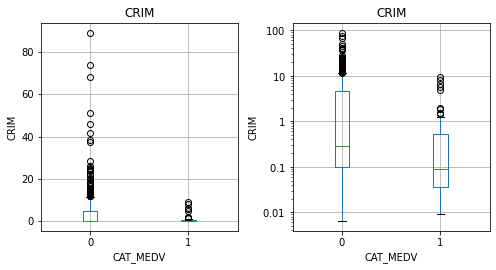

In [15]:
# boxplot: regular and log scale
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 4))

# regular scale
ax = housing_df.boxplot(column="CRIM", by="CAT_MEDV", ax=axes[0])
ax.set_xlabel("CAT_MEDV")
ax.set_ylabel("CRIM")

# log scale
ax = housing_df.boxplot(column="CRIM", by="CAT_MEDV", ax=axes[1])
ax.set_xlabel("CAT_MEDV")
ax.set_ylabel("CRIM")
ax.set_yscale("log")

# suppress the title
axes[0].get_figure().suptitle("")
plt.tight_layout()
plt.show()

Whereas the original plots are hard to understand, the patterns become visible in log
scale. In the histograms, the nature of the relationship between MEDV and CRIM is hard to determine in the original scale, because too many of the points are “crowded” near the y-axis. The re-scaling removes this crowding and allows a better view of the linear relationship between the two log-scaled variables (indicating a log–log relationship). In the boxplot, displaying the crowding toward the x-axis in the original units does not allow us to compare the two box sizes, their locations, lower outliers, and most of the distribution information. Rescaling removes the “crowding to the x-axis” effect, thereby allowing a comparison of the two boxplots.

- Aggregation and Hierarchies

Another useful manipulation of scaling is changing the level of aggregation. For a temporal scale, we can aggregate by different granularity (e.g., monthly, daily, hourly) or even by a “seasonal” factor of interest such as month-of-year or day-of-week. A popular aggregation for time series is a moving average, where the average ofneighboring values within a given window size is plotted. Moving average plots enhance visualizing a global trend.

Non-temporal variables can be aggregated if some meaningful hierarchy exists: geographical (tracts within a zip code in the Boston Housing example), organizational (people within departments within units), etc.

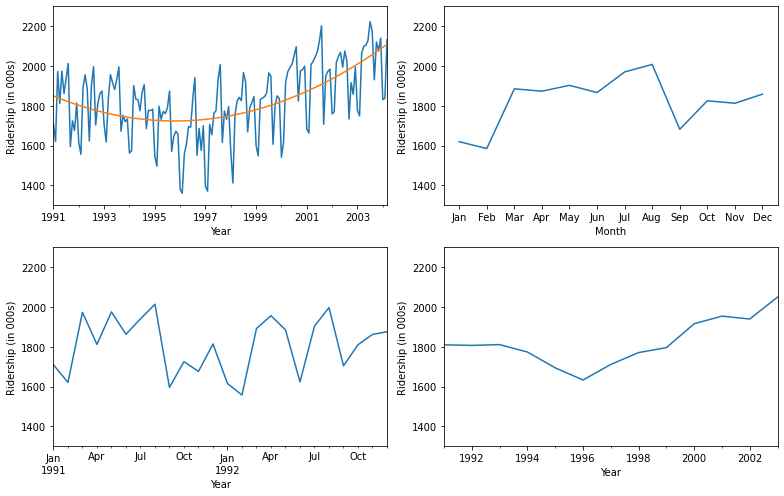

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(11, 7))
amtrack_df = pd.read_csv("../datasets/Amtrak.csv")
amtrack_df["Month"] = pd.to_datetime(amtrack_df.Month, format="%d/%m/%Y")
amtrack_df.set_index("Month", inplace=True)

# fit a quadratic curve and display
quadratic_fit = np.poly1d(np.polyfit(range(len(amtrack_df)), amtrack_df.Ridership, 2))
amtrack_fit = pd.DataFrame({"fit": [quadratic_fit(t) for t in range(len(amtrack_df))]})
amtrack_fit.set_index(amtrack_df.index, inplace=True)
amtrack_df["fit"] = amtrack_fit

ax = amtrack_df.plot(ylim=[1300, 2300], legend=False, ax=axes[0][0])
ax.set_xlabel("Year")
ax.set_ylabel("Ridership (in 000s)")

# zoom in 2-yeat period 1/1/1991 to 12/1/1992
ridership_2yrs = amtrack_df.loc["1991-01-01": "1992-12-01", "Ridership"]
ax = ridership_2yrs.plot(ylim=[1300, 2300], legend=False, ax=axes[1][0])
ax.set_xlabel("Year")
ax.set_ylabel("Ridership (in 000s)")

# average by month
by_month = amtrack_df.groupby(by=[amtrack_df.index.month]).mean()["Ridership"]
ax = by_month.plot(ylim=[1300, 2300], legend=False, ax=axes[0][1])
ax.set_xlabel("Month")
ax.set_ylabel("Ridership (in 000s)")
# set x and y-axis label
yticks = [-2.0, -1.75, -1.5, -1.25, -1.0, -0.75, -0.5, -0.25, 0.0]
ax.set_xticks(range(1, 13))
ax.set_xticklabels([calendar.month_abbr[i] for i in range(1, 13)])

# average by year (exclude data from 2004)
by_year = amtrack_df.loc["1991-01-01":"2003-12-01"].groupby(pd.Grouper(freq="A")).mean()["Ridership"]
ax = by_year.plot(ylim=[1300, 2300], legend=False, ax=axes[1][1])
ax.set_xlabel("Year")
ax.set_ylabel("Ridership (in 000s)")

plt.tight_layout()
plt.show()

 - Zooming and Panning

The ability to zoom in and out of certain areas of the data on a plot is important for revealing patterns and outliers. An example of zooming is shown in the above Figure, where the ridership series is zoomed in to the first two years of the series. Zooming and panning support supervised and unsupervised methods by detecting areas of different behavior, which may lead to creating new interaction terms, new variables, or even separate
models for data subsets. In addition, zooming and panning can help choose between methods that assume global behavior (e.g., regression models) and data-driven methods (e.g., exponential smoothing forecasters and k-nearest-neighbors classifiers), and indicate the level of global/local behavior (as manifested by parameters such as k in k-nearest neighbors, the size of a tree, or the smoothing parameters in exponential smoothing).

- Filtering

Filtering means removing some of the observations from the plot. The purpose of filtering is to focus the attention on certain data while eliminating “noise” created by other data. Filtering supports supervised and unsupervised learning in a similar way to zooming and panning: it assists in identifying different or unusual local behavior.

## Trend Lines and Labels

Trend lines and using in-plot labels also help to detect patterns and outliers. Trend lines serve as a reference, and allow us to more easily assess the shape of a pattern. Although linearity is easy to visually perceive, more elaborate relationships such as exponential and polynomial trends are harder to assess by eye. Trend lines are useful in line graphs as well as in scatter plots.

The figure shows different utilities on a scatter plot that compares fuel cost with total sales. We might be interested in clustering the data, and using clustering algorithms to identify clusters that differ markedly with respect to fuel cost and sales.

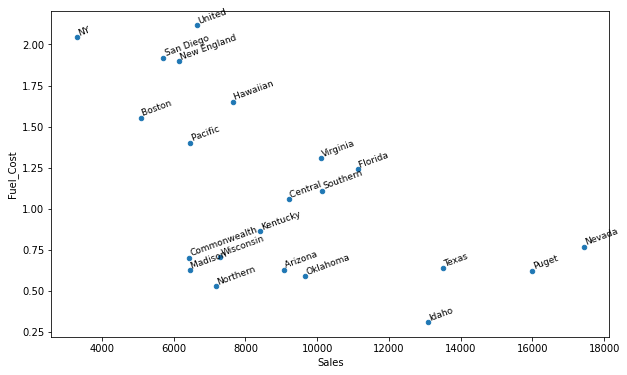

In [17]:
utilities_df = pd.read_csv("../datasets/Utilities.csv")
ax = utilities_df.plot.scatter(x="Sales", y="Fuel_Cost", figsize=(10, 6))
points = utilities_df[["Sales", "Fuel_Cost", "Company"]]
_ = points.apply(lambda x:
                 ax.text(*x, rotation=20, horizontalalignment="left",
                         verticalalignment="bottom", fontsize=9),
                 axis=1)

## Scaling Up to Large Datasets

When the number of observations (rows) is large, plots that display each individual observation (e.g., scatter plots) can become ineffective. Aside from using aggregated charts such as boxplots, some alternatives are:

1. Sampling—drawing a random sample and using it for plotting

2. Reducing marker size

3. Using more transparent marker colors and removing fill

4. Breaking down the data into subsets (e.g., by creating multiple panels)

5. Using aggregation (e.g., bubble plots where size corresponds to number of observations in a certain range)

6. Using jittering (slightly moving each marker by adding a small amount of noise)

An example of the advantage of plotting a sample over the large dataset is shown below that illustrates an improved plot of the full dataset by using smaller markers, using jittering to uncover overlaid points, and more transparent colors. We can see that larger areas of the plot are dominated by the grey class, the black class is mainly on the right, while there is a lot of overlap in the top-right area.

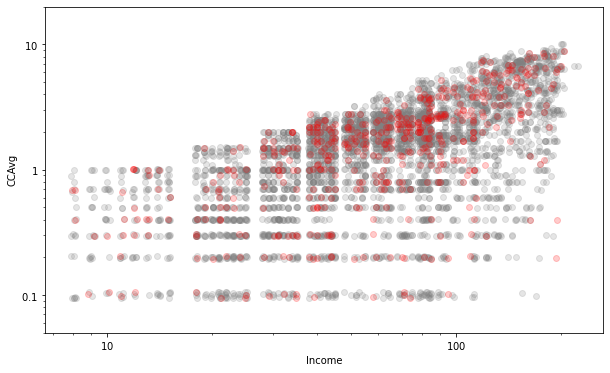

In [18]:
def jitter(x, factor=1):
    """Add random jitter to x values"""
    sx = np.array(sorted(x))
    delta = sx[1:] - sx[:-1]
    min_delta = min(d for d in delta if d>0)
    a = factor * min_delta / 5
    return x + np.random.uniform(-a, a, len(x))

universal_df = pd.read_csv("../datasets/UniversalBank.csv")
sa_idx = universal_df[universal_df["Securities Account"] == 1].index

plt.figure(figsize=(10, 6))
plt.scatter(jitter(universal_df.drop(sa_idx).Income),
            jitter(universal_df.drop(sa_idx).CCAvg),
            marker="o", color="grey", alpha=0.2)
plt.scatter(jitter(universal_df.loc[sa_idx].Income),
            jitter(universal_df.loc[sa_idx].CCAvg),
            marker="o", color="red", alpha=0.2)
plt.xlabel("Income")
plt.ylabel("CCAvg")
plt.ylim((0.05, 20))

axes = plt.gca()
axes.set_xscale("log")
axes.set_yscale("log")
plt.show()

## Multivariate Plot: Parallel Coordinates Plot

Another approach toward presenting multidimensional information in a two-dimensional plot is via specialized plots such as the parallel coordinates plot. In this plot, a vertical axis is drawn for each variable. Then each observation is represented by drawing a line that connects its values on the different axes, thereby creating a “multivariate profile".

In this display, separate panels are used for the two values of CAT.MEDV, in order to compare the profiles of homes in the two classes (for a classification task). We see that the more expensive homes (bottom panel) consistently have low CRIM, low LSAT, and high RM compared to cheaper homes (top panel), which are more mixed on CRIM, and LSAT, and have a medium level of RM. This observation gives indication of useful predictors and
suggests possible binning for some numerical predictors.

Parallel coordinates plots are also useful in unsupervised tasks. They can reveal clusters, outliers, and information overlap across variables. A useful manipulation is to reorder the columns to better reveal observation clusterings.

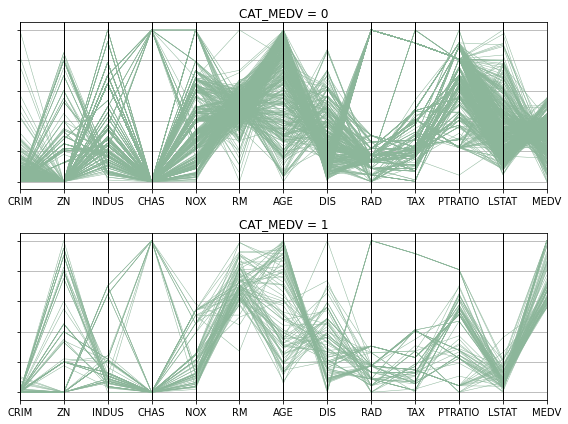

In [19]:
# transform the axes, so that they all have the same range
min_max_scaler = preprocessing.MinMaxScaler()
data_for_plot = pd.DataFrame(min_max_scaler.fit_transform(housing_df),
                             columns=housing_df.columns)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))
for i in (0, 1):
    parallel_coordinates(data_for_plot.loc[data_for_plot.CAT_MEDV == i],
                         "CAT_MEDV", ax=axes[i], linewidth=0.5)
    axes[i].set_title("CAT_MEDV = {}".format(i))
    axes[i].set_yticklabels([])
    axes[i].legend().set_visible(False)

# increase the separation between the plots
plt.tight_layout()

# Specialized Visualizations

In this section, a few specialized visualizations is mentioned that are able to capture data structures beyond the standard time series and cross-sectional structures—special types of relationships that are usually hard to capture with ordinary plots. In particular, we address hierarchical data, network data, and geographical data—three types of data that are becoming increasingly available.

## Visualizing Network Data

Network analysis techniques were spawned by the explosion of social and product network data. Examples of social networks are networks of sellers and buyers on eBay and networks of users on Facebook. An example of a product network is the network of products on Amazon (linked through the recommendation system). Network data
visualization is available in various network-specialized software, and also in general-purpose software.

A network diagram consists of actors and relations between them. “Nodes” are the actors (e.g., users in a social network or products in a product network), and represented by circles. “Edges” are the relations between nodes, and are represented by lines connecting nodes. For example, in a social network such as Facebook, we can construct a list of users (nodes) and all the pairwise relations (edges) between users who are “Friends.” Alternatively, we can define edges as a posting that one user posts on another user’s Facebook page. In this setup, we might have more than a single edge between two nodes. Networks can also have nodes of multiple types. A common structure is networks with two types of nodes.

An example of a two type node network follows next, where it is possible to see a set of transactions between a network of sellers and buyers on the online auction site www.eBay.com [the data are for auctions selling
Swarovski beads, and took place during a period of several months; from Jank and Yahav (2010)].

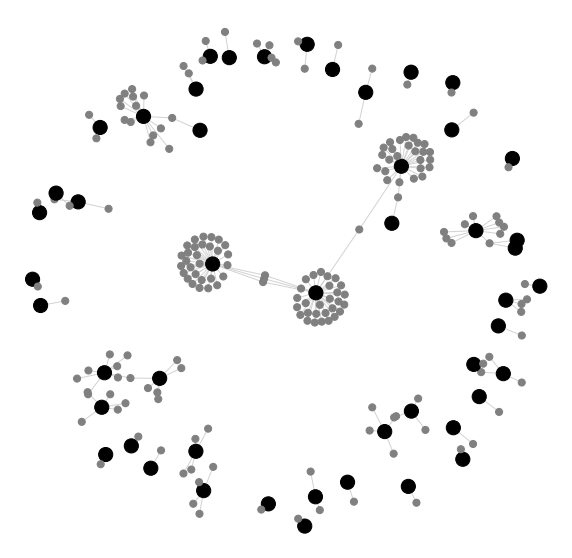

In [20]:
ebay_df = pd.read_csv("../datasets/eBayNetwork.csv")

G = nx.from_pandas_edgelist(ebay_df, source="Seller", target="Bidder")
is_bidder = [n in set(ebay_df.Bidder) for n in G.nodes()]
pos = nx.spring_layout(G, k=0.13, iterations=60, scale=0.5)
plt.figure(figsize=(10, 10))
nx.draw_networkx(G, pos=pos, with_labels=False, edge_color="lightgray",
                 node_color=["gray" if bidder else "black" for bidder in is_bidder],
                 node_size=[50 if bidder else 200 for bidder in is_bidder])
plt.axis("off")
plt.show()

The black circles represent sellers and the grey circles represent buyers. We can see that this marketplace is
dominated by a few high-volume sellers. We can also see that many buyers interact with a single seller. The market structures for many individual products could be reviewed quickly in this way. Network providers could use the information, for example, to identify possible partnerships to explore with sellers.

## Visualizing Hierarchical Data: Treemaps

Treemaps are useful visualizations specialized for exploring large data sets that are hierarchically structured (tree-structured). They allow exploration of various dimensions of the data while maintaining the hierarchical nature of the data.

An example is shown below, which displays a large set of auctions from eBay.com, hierarchically ordered by item category, sub-category, and brand. The levels in the hierarchy of the treemap are visualized as rectangles
containing sub-rectangles. Categorical variables can be included in the display by using hue. Numerical variables can be included via rectangle size and color intensity (ordering of the rectangles is sometimes used to reinforce size).

In the figure, size is used to represent the average closing price (which reflects item value) and color intensity represents the percent of sellers with negative feedback (a negative seller feedback indicates buyer dissatisfaction in past transactions and is often indicative of fraudulent seller behavior). Consider the task of classifying ongoing auctions in terms of a fraudulent outcome. From the treemap, we see that the highest
proportion of sellers with negative ratings (black) is concentrated in expensive item auctions (Rolex and Cartier wristwatches).

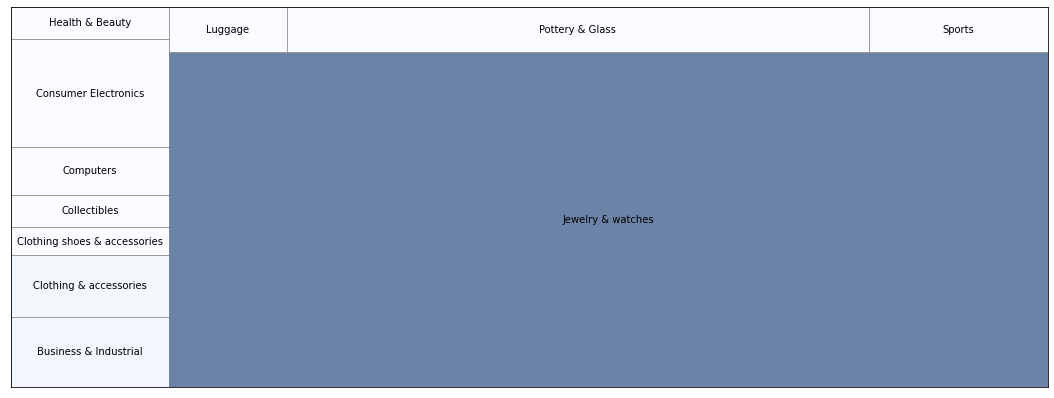

In [21]:
ebay_treemap = pd.read_csv("../datasets/EbayTreemap.csv")
grouped = []

for category, df in ebay_treemap.groupby(["Category"]):
    negative_feedback = sum(df["Seller Feedback"] < 0) / len(df)
    grouped.append({
        "category": category,
        "negative_feedback": negative_feedback,
        "average_bid": df["High Bid"].mean()
    })
by_category = pd.DataFrame(grouped)
norm = matplotlib.colors.Normalize(vmin=by_category.negative_feedback.min(),
                                   vmax=by_category.negative_feedback.max())
colors = [matplotlib.cm.Blues(norm(value)) for value in by_category.negative_feedback]
fig, ax = plt.subplots()
fig.set_size_inches(18, 7)
squarify.plot(label=by_category.category,
              sizes=by_category.average_bid,
              color=colors, ax=ax, alpha=0.6, edgecolor="grey")
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
plt.subplots_adjust(left=0.1)
plt.show()

Treemap showing nearly 11,000 eBay auctions, organized by item category. Rectangle size represents average closing
price. Shade represents % of sellers with negative feedback (darker = higher). Ideally, treemaps should be explored interactively, zooming to different levels of the hierarchy. One example of an interactive online
application of treemaps is currently available at www.drasticdata.nl. One of their treemap examples displays player-level data from the 2014 World Cup, aggregated to team level. The user can choose to explore players and team data.

## Visualize Geographical Data: Map Charts

Many datasets used for data mining now include geographical information. Zip codes are one example of a categorical variable with many categories, where it is not straightforward to create meaningful variables for analysis. Plotting the data on a geographic map can often reveal patterns that are harder to identify otherwise. A map chart uses a geographical map as its background; then color, hue, and other features are used to include categorical or numerical variables. Besides specialized mapping software, maps are now becoming part of general-purpose software, and Google Maps provides APIs (application programming interfaces) that allow organizations to overlay their data on a Google map. While Google Maps is readily available, resulting map charts (such as figure below) are somewhat inferior in terms of effectiveness compared to map charts in dedicated interactive visualization software.

In [22]:
#sc_students = pd.read_csv("../datasets/SC-US-students-GPS-data-2016.csv")
#gmaps.configure(api_key=os.environ["GMAPS_API_KEY"])
#fig = gmaps.figure(center=(39.7, -105), zoom_level=3)
#fig.add_layer(gmaps.symbol_layer(sc_students, scale=2, fill_color="red", stroke_color="red"))
#fig

The next figure shows two world map charts comparing countries’ “well-being” (according to a 2006 Gallup survey) in the top map, to gross domestic product (GDP) in the bottom map. Lighter shade means higher value.

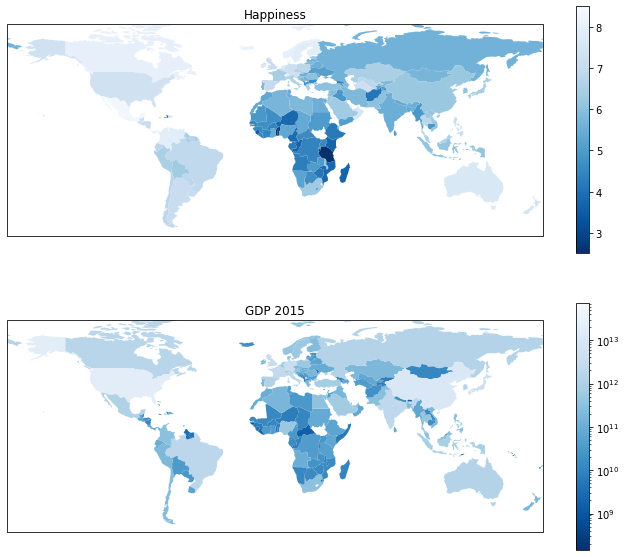

In [23]:
gdp_df = pd.read_csv("../datasets/gdp.csv", skiprows=4)
gdp_df.rename(columns={"2015": "GDP2015"}, inplace=True)
# use three letter countr code to access rows
gdp_df.set_index("Country Code", inplace=True)

# the file contains a column with two letter combinations, use na_filter to avoid
# converting the combination NA into not-a-number
happines_df = pd.read_csv("../datasets/Veerhoven.csv", na_filter=False)
# use the country name to access rows
happines_df.set_index("Code", inplace=True)
fig = plt.figure(figsize=(12, 10))
ax1 = plt.subplot(2, 1, 1, projection=ccrs.PlateCarree())
ax1.set_extent([-150, 60, -25, 60])
ax2 = plt.subplot(2, 1, 2, projection=ccrs.PlateCarree())
ax2.set_extent([-150, 60, -25, 60])

# Create a color mapper
cmap = plt.cm.Blues_r
norm1 = matplotlib.colors.Normalize(vmin=happines_df.Score.dropna().min(),
                                    vmax=happines_df.Score.dropna().max())
norm2 = matplotlib.colors.LogNorm(vmin=gdp_df.GDP2015.dropna().min(),
                                  vmax=gdp_df.GDP2015.dropna().max())
shpfilename = shpreader.natural_earth(resolution="110m", category="cultural",
                                       name="admin_0_countries")
reader = shpreader.Reader(shpfilename)
countries = reader.records()
for country in countries:
    country_code = country.attributes["ADM0_A3"]
    if country_code in gdp_df.index:
        ax2.add_geometries([country.geometry], ccrs.PlateCarree(),
                           facecolor=cmap(norm2(gdp_df.loc[country_code].GDP2015)))
        # check various attributes to find the matching two-letter combinations
        nation = country.attributes["POSTAL"]
        if nation not in happines_df.index: nation = country.attributes["ISO_A2"]
        if nation not in happines_df.index: nation = country.attributes["WB_A2"]
        if nation not in happines_df.index: nation = country.attributes["SOV_A3"]
        if nation not in happines_df.index: nation = country.attributes["GU_A3"]
        if nation not in happines_df.index and country.attributes["NAME"] == "Norway": nation = "NO"
        if nation in happines_df.index:
            ax1.add_geometries([country.geometry], ccrs.PlateCarree(),
                               facecolor=cmap(norm1(happines_df.loc[nation].Score)))

ax2.set_title("GDP 2015")
sm = plt.cm.ScalarMappable(norm=norm2, cmap=cmap)
sm._A = []
cb = plt.colorbar(sm, ax=ax2)
cb.set_ticks([1e8, 1e9, 1e10, 1e11, 1e12, 1e13])
ax1.set_title("Happiness")
sm = plt.cm.ScalarMappable(norm=norm1, cmap=cmap)
sm._A = []
cb = plt.colorbar(sm, ax=ax1)
cb.set_ticks([3, 4, 5, 6, 7, 8])
plt.show()

Something wrong with Chile